In [1]:
import sys
sys.path.append("../../")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import pyACC logger
from pyACC.helpers import Logger

# Set the logger
print = Logger("pyACC.CosmologicalDistances")

# Import integration class
from pyACC.cosmology import comoving_distance_from_H 

# Import pandas
#import pandas as pd

# Compute cosmological distances

In this exercise you will keep practicing integration in a cosmological context.
In particular you will compute cosmological distances.

The basis to compute distances is the Hubble function $H(z)$, which describes the evolution of the backgroud.

for flat $\Lambda$ CDM cosmology it reads:

$$ D_c(z) = \int_0^z \frac{\mathrm{d} z' c}{H(z')} $$

Implement this function, or try your favourite cosmological model!

In [2]:
# Implement your favourite Hubble function
def hubble_function(z, H0, Omega_m):

    return H0*np.sqrt(Omega_m*(1+z)**3 + 1 - Omega_m)

In [3]:
H0=67 #Km/s/Mpc
Omega_m = 0.3


In [4]:
# Now use the function you've implemented to compute cosmological distances
# Use the class you've implemented
get_distances = comoving_distance_from_H(hubble_function, 1, H0, Omega_m)

In [5]:
# Comoving distance at z=1
print(get_distances, "Mpc")

2024-03-06 12:28:32.197590 :: pyACC.CosmologicalDistances  :: 3454.1510437066163 Mpc


In [11]:
# array of redshifts
z_list = np.linspace(0.0001, 2.5, 100)

# Calculate the comoving distance at each redshift in z_list
comoving_distance = [comoving_distance_from_H(hubble_function, z, H0, Omega_m) for z in z_list]

# Calculate the angular diameter distance at each redshift in z_list
angular_diameter_distance = comoving_distance/(1+z_list)

# Calculate the luminosity distance at each redshift in z_list
luminosity_distance = (1+z_list)*comoving_distance

# Calculate the distance modulus at each redshift in z_list
distance_modulus = 5*np.log10(luminosity_distance*1e+6)-5

In [14]:
print(type(comoving_distance))

2024-03-06 12:51:52.646442 :: pyACC.CosmologicalDistances  :: <class 'list'>


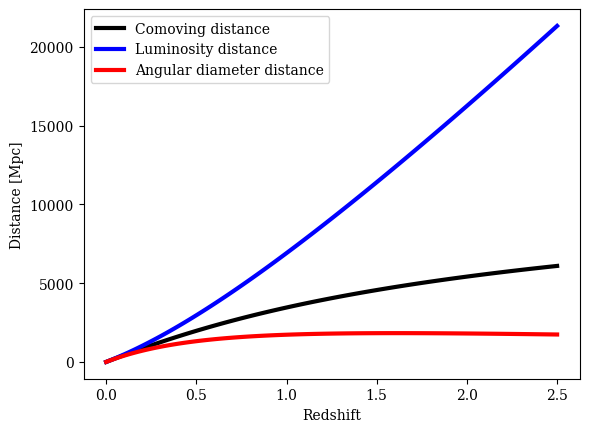

In [12]:
plt.plot(z_list, comoving_distance, lw=3, color="k", label="Comoving distance")
plt.plot(z_list, luminosity_distance, lw=3, color="b", label="Luminosity distance")
plt.plot(z_list, angular_diameter_distance, lw=3, color="r", label="Angular diameter distance")

plt.legend()
plt.xlabel("Redshift")
plt.ylabel("Distance [Mpc]");

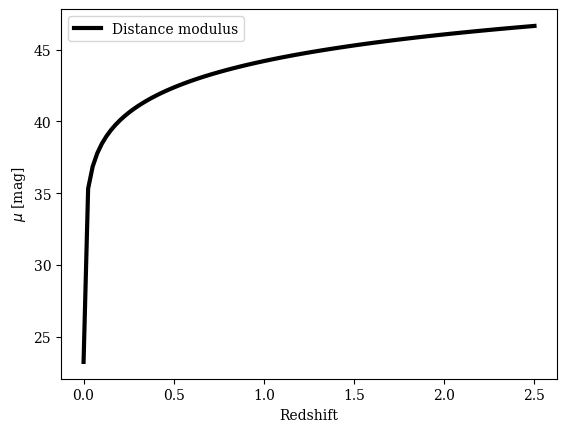

In [13]:
plt.plot(z_list, distance_modulus, lw=3, color="k", label="Distance modulus")
plt.legend()
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]");

## Compare against experimental data


Let's plot the SNIa distance moduli from Pantheon+ analysis against your favourite cosmological model.

Check out the [paper](https://arxiv.org/abs/2112.03863). 
Data are stored [here](https://github.com/PantheonPlusSH0ES/PantheonPlusSH0ES.github.io).
Try to understand which table you should use for the plot.

In [ ]:
# Read the data from Pantheon+ set. 
# Suggestion #1: pandas
# Suggestion #2: read the documentation to understand which column you should pick

In [ ]:
plt.plot(z_list, distance_modulus, lw=2, color="k", label="LCDM - Distance modulus", zorder=1000)
plt.errorbar(.., ..., ..., fmt="o", color="0.5", alpha=0.5, label="Pantheon+")

plt.grid(True, color="0.9", ls="--")
plt.legend(loc="lower right")
plt.xlabel("Redshift")
plt.ylabel("$\mu$ [mag]")